In [507]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis

In [508]:
# Reading the dataset
file_path = 'C:/Users/15199/DSI/rk_team_project/Data/Raw/rawdata.csv'
df = pd.read_csv(file_path)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [509]:
print(f"The dataset has {df.shape[0]} observations and {df.shape[1]} variables.")

The dataset has 5110 observations and 12 variables.


In [510]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [511]:
# summary of numerical variables
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


From the count in the above summary, it's clear that bmi has some missing values.

In [512]:
# number of missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [513]:
categorical = list(df.columns.drop(['id', 'age', 'avg_glucose_level', 'bmi']))
print(categorical)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [514]:
for x in categorical:
    print(f"The '{x}' variable has the following unique values:\n")
    
    # Count occurrences of each unique value
    value_counts = df[x].value_counts()
    
    for category, count in value_counts.items():
        print(f"  - {category}: {count}")
    print("\n")

The 'gender' variable has the following unique values:

  - Female: 2994
  - Male: 2115
  - Other: 1


The 'hypertension' variable has the following unique values:

  - 0: 4612
  - 1: 498


The 'heart_disease' variable has the following unique values:

  - 0: 4834
  - 1: 276


The 'ever_married' variable has the following unique values:

  - Yes: 3353
  - No: 1757


The 'work_type' variable has the following unique values:

  - Private: 2925
  - Self-employed: 819
  - children: 687
  - Govt_job: 657
  - Never_worked: 22


The 'Residence_type' variable has the following unique values:

  - Urban: 2596
  - Rural: 2514


The 'smoking_status' variable has the following unique values:

  - never smoked: 1892
  - Unknown: 1544
  - formerly smoked: 885
  - smokes: 789


The 'stroke' variable has the following unique values:

  - 0: 4861
  - 1: 249




Id column is the unique identifier of each patient and doesn't contribute to the data analysis, so we can drop it.

In [515]:
df = df.drop('id', axis=1)
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [516]:
# Convert multiple object columns to category
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].astype('category')

# Check the data types
print(df.dtypes)

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


## Data Visualization

In [517]:
counts_dict = {col: df[col].value_counts().to_dict() for col in categorical}
counts_nested_list = [list(counts_dict[col].values()) for col in categorical]
counts_list = [count for sublist in counts_nested_list for count in sublist]
print(counts_list)

[2994, 2115, 1, 4612, 498, 4834, 276, 3353, 1757, 2925, 819, 687, 657, 22, 2596, 2514, 1892, 1544, 885, 789, 4861, 249]


In [518]:
# Sample Data of categories, subcategories and the count of each subcategory
data = {
    "category": ["gender", "gender", "gender", "hypertension", "hypertension", "heart_disease", "heart_disease", "ever_married", "ever_married", 
                 "work_type", "work_type", "work_type", "work_type", "work_type", "Residence_type", "Residence_type", 
                 "smoking_status", "smoking_status", "smoking_status", "smoking_status", "stroke", "stroke"],
    "subcategory": ["Female", "Male", "Other", "No Hypertension", "Hypertension", "No Heartdisease", "Heartdisease", "Yes", "No",
                    "Private", "Self-employed", "children", "Govt job", "Never Worked", "Urban", "Rural", 
                    "Never smoked", "Unknown", "Formerly smoked", "Smokes", "No Stroke", "Stroke"],
    "count": counts_list
}

df_sunburst = pd.DataFrame(data)

# Custom Color Mapping
category_colors = {
    "gender": "navyblue",
    "hypertension": "skyblue",
    "heart_disease": "green",
    "ever_married" : "brown",
    "stroke": "grey",
    "work_type": "orange",
    "Residence_type": "purple",
    "smoking_status": "yellow"
}

# Assign colors based on category
df_sunburst["color"] = df_sunburst["category"].map(category_colors)

# Create Sunburst Chart
fig = px.sunburst(df_sunburst, 
                  path=["category", "subcategory"],  
                  values="count",
                  title="Categorical Data Visualization",
                  color="category",
                  color_discrete_map=category_colors)

fig.update_layout(
    hovermode=False  # Disable hover interaction completely
)

fig.update_traces(
    textinfo="label + text + value",  # Show category, subcategory, and respective counts
    textfont=dict(family="Arial", size=18, color="black"),
    insidetextorientation="radial",  # Align text radially, evenly distributed
    marker=dict(
        line=dict(color="black", width=2)  # Add black border with width 2
    )
)

# Adjust figure size
fig.update_layout(
    width=800,  
    height=800,  
    title_x=0.5,
    font=dict(family="Arial", size=14), 
    title_font=dict(size=40, family="Arial", color="black", weight = "bold")  # Title font formatting
)

fig.write_html("sunburst_chart_original_data.html")

fig.show()

[Sunburst Chart of Original Dataset](https://github.com/Mulders95/Team_1/blob/main/Stroke_Plots/sunburst_chart_original_data.html)

The chart reveals that the dataset has imbalanced classes for stroke, hypertension, and heart disease.

## Data Cleaning

In [519]:
#Obtain the count information for the values in the stroke, hypertension, and  heart_disease variables

def get_counts(df, column_name):
    # Convert the column_name type to int64, handling potential errors
    df[column_name] = pd.to_numeric(df[column_name], errors='raise').astype('int64')
    
    #calculate the value counts and sort by index which will be the column_name values.
    value_counts = df[column_name].value_counts().sort_index()
    print(f"Frequency counts for '{column_name}':\n{value_counts}\n")

get_counts(df,'stroke')
get_counts(df, 'hypertension')
get_counts(df, 'heart_disease')

Frequency counts for 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Frequency counts for 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64

Frequency counts for 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64



In [520]:
#avg_glucose_level

#We are creating a new variable avg_glucose_level_temp_cat using the avg_glucose_level variable. The purpose of this new variable 
#is to help us in imputing the missing values of the bmi variable

#Note that the minimum value for avg_glucose_level is 55.12 and  the maximum value is 271.74

# Define the bins and labels
#bins = [50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, float('inf')]
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#bins = [50, 90, 130, 170, 210, float('inf')]
#labels = [1, 2, 3, 4, 5]
#bins = [50, 100, 150, 200, float('inf')]
#labels = [1, 2, 3, 4]
#bins = [50, 120, 190, float('inf')]
#labels = [1, 2, 3]
#bins = [50, 150,float('inf')]
#labels = [1, 2]

#The bins above were used to play around with the data when determining the optimal bin values 
#for creating the new variable avg_glucose_level_temp_cat from avg_glucose_level

# Define the bins and labels
bins = [50, 120, 190, float('inf')]
labels = [1, 2, 3]

# Create the 'avg_glucose_level_temp' column using pd.cut
df['avg_glucose_level_temp_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['avg_glucose_level_temp'] = label_encoder.fit_transform(df['avg_glucose_level_temp_cat']) + 1 # +1 to match the original labels

df.drop('avg_glucose_level_temp_cat', axis=1, inplace=True)
# Print the DataFrame with the new categorical column
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,3
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1


In [521]:
#Gender variable
#Transform the Gender variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
get_counts(df,'gender_encoded')

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Gender Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
2       1
Name: count, dtype: int64

Gender Mapping:
Female: 0
Male: 1
Other: 2


In [522]:
#Filtering
# Filter rows where Gender is 'Other'
other_gender_rows = df[df['gender'] == 'Other']
other_gender_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,2,2


In [523]:
df = df.drop(df[df['gender'] == 'Other'].index) #Drop rows where Gender is 'Other'
get_counts(df,'gender_encoded')


Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
Name: count, dtype: int64



In [524]:
#ever_married
#Transform the ever_married variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ever_married' column
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("ever_married Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  
0                       3               1                     1  
1                       3               0                     1  
2                       1               1                     1  
ever_married Mapping:
No: 0
Yes: 1


In [525]:
#Worktype
print (df['work_type'].cat.categories)
df_children = df[ (df['work_type'] == 'children')] 
df_children.to_csv('stroke_data_children.csv', index = False)

#show all observations when work_type is children and any of hypertension, heart_disease, and 'stroke' is 1
filtered_df = df[
    (df['work_type'] == 'children') &
   ( (df['stroke'] == 1) |
    (df['hypertension'] == 1) |
    (df['heart_disease'] == 1)
   )
]

# Print the filtered observations
filtered_df

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded,ever_married_encoded
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1,1,0,0
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,1,0,0
3031,Male,2.00,0,1,No,children,Urban,62.89,29.4,Unknown,0,1,1,0


In [526]:
#Remove the children level from variable work_type
df = df.drop(df[df['work_type'] == 'children'].index)
print (df[df['work_type'] == 'children'])

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, avg_glucose_level_temp, gender_encoded, ever_married_encoded]
Index: []


In [527]:
# Drop the 'children' level from the 'work_type' category
df['work_type'] = df['work_type'].cat.remove_categories('children')
print (df['work_type'].cat.categories)

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed'], dtype='object')


In [528]:
print (df.shape) #4,422 observations at this time in df dataframe

(4422, 14)


In [529]:
#Work type encoding

#Transform the Work type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'work_type' column
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))



# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("work_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")




   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  
0                  2  
1                  3  
2                  2  
work_type Mapping:
Govt_job: 0
Never_worked: 1
Privat

In [530]:
#Residence type

#Transform the Residence type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Residence_type' column
df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  Residence_type_encoded  
0                  2                       1  
1                  3                       0  
2   

In [531]:
#smoking status
#Transform the smoking status variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_status' column
df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  Residence_type_encoded  smoking_status_encoded  
0                  2                       1                       1  
1  

In [532]:
print (df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
avg_glucose_level_temp       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
dtype: object


In [533]:
#Age
#Give summary statistics for ALL people in this dataset
print(df['age'].describe())
print()

count    4422.000000
mean       48.883311
std        18.706121
min         7.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64



In [534]:
#obtain and print the 10 youngest people in this dataset with EITHER hypertension, heart disease OR stroke
df_disease = df[ ((df['stroke'] == 1) | (df['heart_disease'] == 1) | (df['hypertension'] == 1))]
age_disease_youngest_10 = df_disease.nsmallest(10, 'age')
#print observations for youngest 10 with any of the three diseases
df_disease.sort_values(by='age').head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,1,1,0,2,0,0
2387,Female,19.0,1,0,No,Private,Rural,65.96,29.0,never smoked,0,1,0,0,2,0,2
1554,Female,22.0,1,0,No,Private,Urban,71.22,40.0,never smoked,0,1,0,0,2,1,2
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,1,0,0,2,1,3
2083,Female,24.0,1,0,No,Private,Urban,107.22,35.3,smokes,0,1,0,0,2,1,3
1746,Male,24.0,1,0,Yes,Private,Rural,80.63,28.2,smokes,0,1,1,1,2,0,3
2949,Female,26.0,1,0,Yes,Private,Urban,107.59,33.1,smokes,0,1,0,1,2,1,3
3667,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0,1,0,1,0,0,2
3885,Female,28.0,0,1,Yes,Private,Rural,111.27,19.1,smokes,0,1,0,1,2,0,3
715,Female,28.0,1,0,No,Private,Rural,80.40,57.5,never smoked,0,1,0,0,2,0,2


In [535]:
#Hypertension
#df_hypertension_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that hypertension = 1 (present)
df_hypertension_only = df_disease[df_disease['hypertension'] == 1]
print (df_hypertension_only.shape)

(498, 17)


In [536]:
hypertension_min_age = df_hypertension_only['age'].min()
print (hypertension_min_age)
#print (df_hypertension_only.head(3))

17.0


In [537]:
#df_hypertension_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with hypertension.
df_hypertension_full = df[df['age'] >= hypertension_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_hypertension_full.shape) 

(4313, 17)


In [538]:
#Heart disease
#df_heart_disease_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that heart_disease = 1 (present)
df_heart_disease_only = df_disease[df_disease['heart_disease'] == 1]
print (df_heart_disease_only.shape)

(275, 17)


In [539]:
heart_disease_min_age = df_heart_disease_only['age'].min()
print (heart_disease_min_age)

28.0


In [540]:
#df_heart_disease_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with heart disease.
df_heart_disease_full = df[df['age'] >= heart_disease_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_heart_disease_full.shape) 

(3700, 17)


In [541]:
#Stroke
#df_stroke_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that stroke = 1 (present)
df_stroke_only = df_disease[df_disease['stroke'] == 1]
print (df_stroke_only.shape)

(247, 17)


In [542]:
stroke_min_age = df_stroke_only['age'].min()
print (stroke_min_age)

32.0


In [543]:
#df_stroke_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with stroke.
df_stroke_full = df[df['age'] >= stroke_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_stroke_full.shape) 

(3461, 17)


In [544]:
#This function creates a categorical age variable based on the median age with the dataframe it receives as an argument.
#(One of the variables in the dataframe argument must be age.) It then returns the modified dataframe.
def create_age_category(df, age_column='age', category_name='Age_temp_cat'):
    median_age = round(df[age_column].median())
    print("Median Age:", median_age)

    bins = [0, median_age, df[age_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df



In [545]:
#This function encodes a categorical age variable in a dataframe using LabelEncoder.
#It then drops the categorical age variable and returns the modified dataframe.
def encode_age_category(df, category_name='Age_temp_cat', encoded_name='Age_temp'):
    encoder = LabelEncoder()
    df[encoded_name] = encoder.fit_transform(df[category_name])
    df.drop(category_name, axis=1, inplace=True)
    return df

In [546]:
#Creates a categorical glucose level column based on the median glucose level and 
#returns the modified dataframe
def create_glucose_category(df, glucose_column='avg_glucose_level', category_name='avg_glucose_level_temp_cat'):
    median_glucose = round(df[glucose_column].median())
    print("Median Avg Glucose Level:", median_glucose)

    bins = [0, median_glucose, df[glucose_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[glucose_column], bins=bins, labels=labels, right=False)
    return df

In [547]:
# Encodes the categorical glucose level column using LabelEncoder and
# returns the modified dataframe
def encode_glucose_category(df, category_name='avg_glucose_level_temp_cat', encoded_name='avg_glucose_level_temp'):
    label_encoder = LabelEncoder()
    df[encoded_name] = label_encoder.fit_transform(df[category_name]) + 1  # +1 to match the original labels
    df.drop(category_name, axis=1, inplace=True)
    return df

In [548]:
#  Imputes missing BMI values using grouped medians based on other relevant variables in this dataframe. 
def impute_bmi_with_grouped_medians(df):
     # Identify the variables to group by
    grouping_columns = [
                         'gender_encoded',
                         'work_type_encoded',
                        'Residence_type_encoded', 'smoking_status_encoded',
                        'Age_temp' , 'avg_glucose_level_temp'
                        ]
    # Calculate grouped medians
    grouped_medians = df.groupby(grouping_columns)['bmi'].transform('median')

     # Impute missing values
    df['bmi'] = df['bmi'].fillna(grouped_medians)
    return (df)

In [549]:
 #prints observations with missing BMI values in a DataFrame.
def print_missing_bmi_rows(df, bmi_column='bmi'):
    missing_bmi_rows = df[df[bmi_column].isnull()]
    if not missing_bmi_rows.empty:
        print("Rows with missing BMI values:")
        print(missing_bmi_rows)
    else:
        print("No missing BMI values found.")

In [550]:
# Create the Age_temp_cat column
df_stroke_full = create_age_category(df_stroke_full)

# Encode the Age_temp_cat column
df_stroke_full = encode_age_category(df_stroke_full)

df_stroke_full.head(3)

Median Age: 55


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,Age_temp
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3,1,1,2,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,3,0,1,3,0,2,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,2,0,2,1


In [551]:
# Create the avg_glucose_level_temp_cat column
df_stroke_full = create_glucose_category(df_stroke_full)

# Encode the avg_glucose_level_temp_cat column
df_stroke_full = encode_glucose_category(df_stroke_full)

Median Avg Glucose Level: 94


In [552]:
# Impute missing BMI values
df_stroke_full = impute_bmi_with_grouped_medians(df_stroke_full)
df_stroke_full.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,Age_temp
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2,1,1,2,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1,2,0,1,3,0,2,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,1,1,2,0,2,1


In [553]:
#checking for presence of missing values
print (df_stroke_full.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
avg_glucose_level_temp    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
dtype: int64


In [554]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_stroke_full)

No missing BMI values found.


In [555]:
df_stroke_full['work_type'].value_counts()

work_type
Private          2122
Self-employed     763
Govt_job          576
Never_worked        0
Name: count, dtype: int64

In [556]:
df_stroke_full.shape

(3461, 18)

In [557]:
# Write the cleaned df_stroke_full dataframe to a csv file
df_stroke_full.to_csv('stroke_full_data_cleaned.csv', index=False)

In [558]:
# Create the Age_temp_cat column
df_heart_disease_full = create_age_category(df_heart_disease_full)

# Encode the Age_temp_cat column
df_heart_disease_full = encode_age_category(df_heart_disease_full)

#print (df_heart_disease_full.head(3))

Median Age: 54


In [559]:
# Create the avg_glucose_level_temp_cat column
df_heart_disease_full = create_glucose_category(df_heart_disease_full)

# Encode the avg_glucose_level_temp_cat column
df_heart_disease_full = encode_glucose_category(df_heart_disease_full)

Median Avg Glucose Level: 93


In [560]:
# Impute missing BMI values
df_heart_disease_full = impute_bmi_with_grouped_medians(df_heart_disease_full)
df_heart_disease_full.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_temp,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,Age_temp
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,2,1,1,2,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.75,never smoked,1,2,0,1,3,0,2,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,2,1,1,2,0,2,1


In [561]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_heart_disease_full)

No missing BMI values found.


In [562]:
# Write the cleaned df_heart_disease_full dataframe to a csv file
df_heart_disease_full.to_csv('heart_disease_full_data_cleaned.csv', index=False)

Code relevant to hypertension dataframe only follows:

In [563]:
# Create the Age_temp_cat column
df_hypertension_full = create_age_category(df_hypertension_full)

# Encode the Age_temp_cat column
df_hypertension_full = encode_age_category(df_hypertension_full)

#print (df_heart_disease_full.head(3))

Median Age: 50


In [564]:
# Create the avg_glucose_level_temp_cat column
df_hypertension_full = create_glucose_category(df_hypertension_full)

# Encode the avg_glucose_level_temp_cat column
df_hypertension_full = encode_glucose_category(df_hypertension_full)

Median Avg Glucose Level: 92


In [565]:
# Impute missing BMI values
df_hypertension_full = impute_bmi_with_grouped_medians(df_hypertension_full)
#print (df_hypertension_full.head(3))

In [566]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_hypertension_full)

No missing BMI values found.


In [567]:
# Write the cleaned df_heart_disease_full dataframe to a csv file
df_hypertension_full.to_csv('hypertension_full_data_cleaned.csv', index=False)

## Data Visualization of cleaned Stroke dataset

In [568]:
stroke_df = pd.read_csv("C:/Users/15199/DSI/rk_team_project/stroke_full.csv")
stroke_df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,Age_temp,avg_glucose_level_temp
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,1,1,2
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1,0,1,3,0,2,1,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,2,0,2,1,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,2,1,3,0,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,3,0,2,1,2


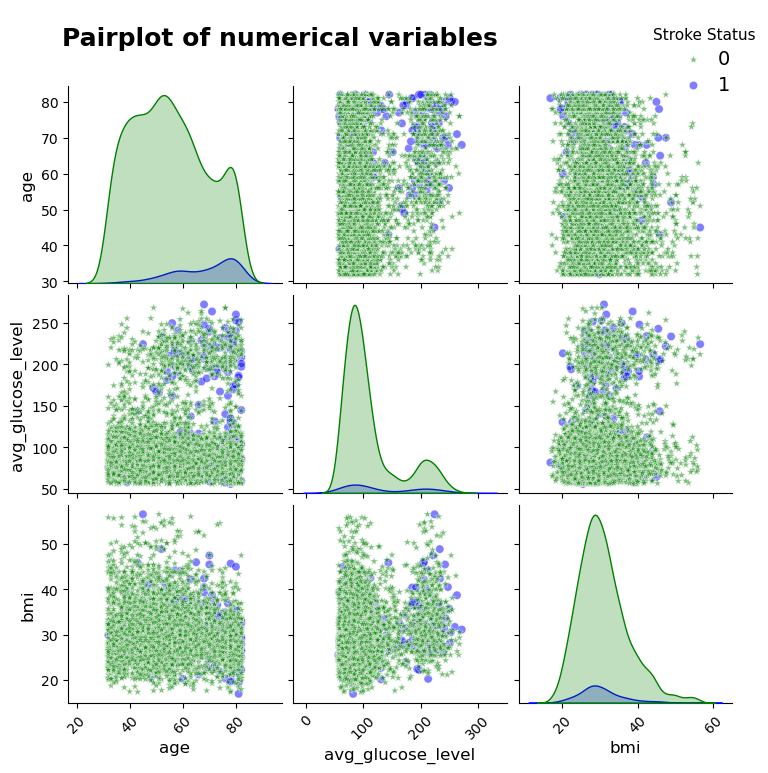

In [569]:
# Create the pairplot
color_pallete = {0: 'green', 1: 'blue'}
pair = sns.pairplot(stroke_df, 
                 hue="stroke", 
                 vars=['age', 'avg_glucose_level', 'bmi'], 
                 plot_kws={'alpha': 0.5}, 
                 markers=["*", "o"],
                 palette=color_pallete)

# Set the title of the entire plot
pair.fig.suptitle('Pairplot of numerical variables', size=18, weight='bold', x=0.35)

# Adjust title position
pair.fig.subplots_adjust(top=0.9)

# Set axis labels
for ax in pair.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# Customize the ticks (size, rotation, etc.)
for ax in pair.axes.flatten():
    ax.tick_params(axis='x', labelsize=10, rotation=45) 
    ax.tick_params(axis='y', labelsize=10) 

pair._legend.set_bbox_to_anchor((0.95, 0.95))
pair._legend.set_title('Stroke Status', prop={'size': 11})
for text in pair.legend.get_texts():
    text.set_fontsize(14)

plt.show()


Observations from the pairplot:
1. The distribution of Age is likely right-skewed for stroke cases (1), suggesting higher stroke risk in older individuals.
2. The impact of average glucose level and body mass index (bmi) on occurence of stroke is relatively less.
3. The scatterplot between age and avg_glucose_level shows that the older individuals with elevated glucose have denser clusters of stroke cases (1).
4. Age appears to be a dominant factor, with glucose and BMI contributing incrementally.

In [570]:
cols = []
for i in range(11):
    cols.append(stroke_df.columns[i])

# Removing specified columns
cols = [col for col in cols if col not in ['age', 'bmi', 'avg_glucose_level']]

print(cols)

counts_dict = {col: stroke_df[col].value_counts().to_dict() for col in cols}
counts_nested_list = [list(counts_dict[col].values()) for col in cols]
counts_list = [count for sublist in counts_nested_list for count in sublist]
print(counts_list)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
[2026, 1387, 2936, 477, 3139, 274, 3051, 362, 2090, 753, 570, 1729, 1684, 1371, 773, 661, 608, 3166, 247]


In [571]:
# Sample Data of categories, subcategories and the count of each subcategory
data = {
    "category": ["gender", "gender", "hypertension", "hypertension", "heart_disease", "heart_disease", "ever_married", "ever_married", 
                 "work_type", "work_type", "work_type", "Residence_type", "Residence_type", 
                 "smoking_status", "smoking_status", "smoking_status", "smoking_status", "stroke", "stroke"],
    "subcategory": ["Female", "Male", "No Hypertension", "Hypertension", "No Heartdisease", "Heartdisease", "Yes", "No",
                    "Private", "Self-employed", "Govt job", "Urban", "Rural", 
                    "Never smoked", "Unknown", "Formerly smoked", "Smokes", "No Stroke", "Stroke"],
    "count": counts_list
}

df1 = pd.DataFrame(data)

# Create Sunburst Chart
fig = px.sunburst(df1, 
                  path=["category", "subcategory"],  
                  values="count",
                  title="Stroke Dataset - Categorical Data Visualization",
                  color="category",
                  color_continuous_scale='Tealgrn')

fig.update_traces(
    textinfo="label + text + value",  # Show category, subcategory, and respective counts
    textfont=dict(family='Arial', size=18, color='black', weight='bold'),
    insidetextorientation="radial",  # Align text radially, evenly distributed
    marker=dict(
        line=dict(color="black", width=2)  # Add black border with width 2
    )
)

# Adjust figure size
fig.update_layout(
    hovermode=False,
    width=1000,  
    height=1000,  
    title_x=0.5,
    font=dict(family="Arial", size=14), 
    title_font=dict(size=30, family="Arial", color="black", weight = "bold")  # Title font formatting
)

fig.write_html("sunburst_chart_stroke_data.html")

fig.show()

[Sunburst chart of Stroke Dataset](https://github.com/Mulders95/Team_1/blob/main/Stroke_Plots/sunburst_chart_stroke_data.html)

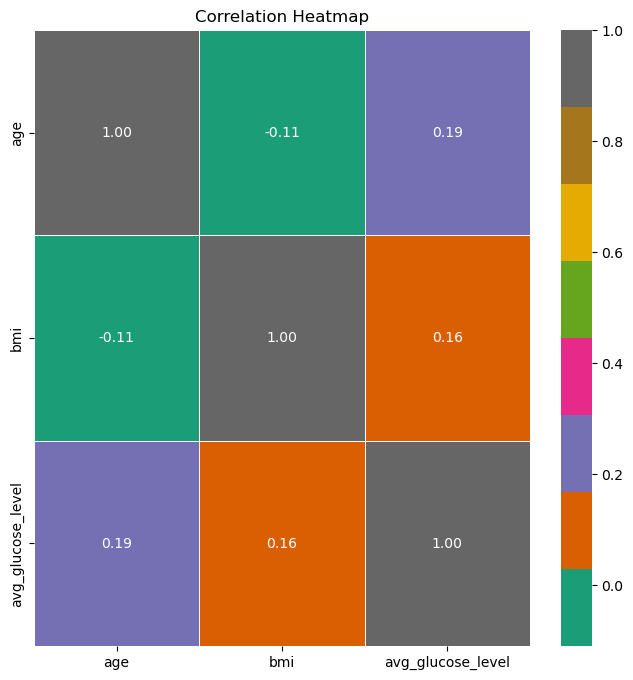

In [572]:
columns = ['age', 'bmi', 'avg_glucose_level']

corr_matrix = stroke_df[columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with the mask
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Dark2", linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

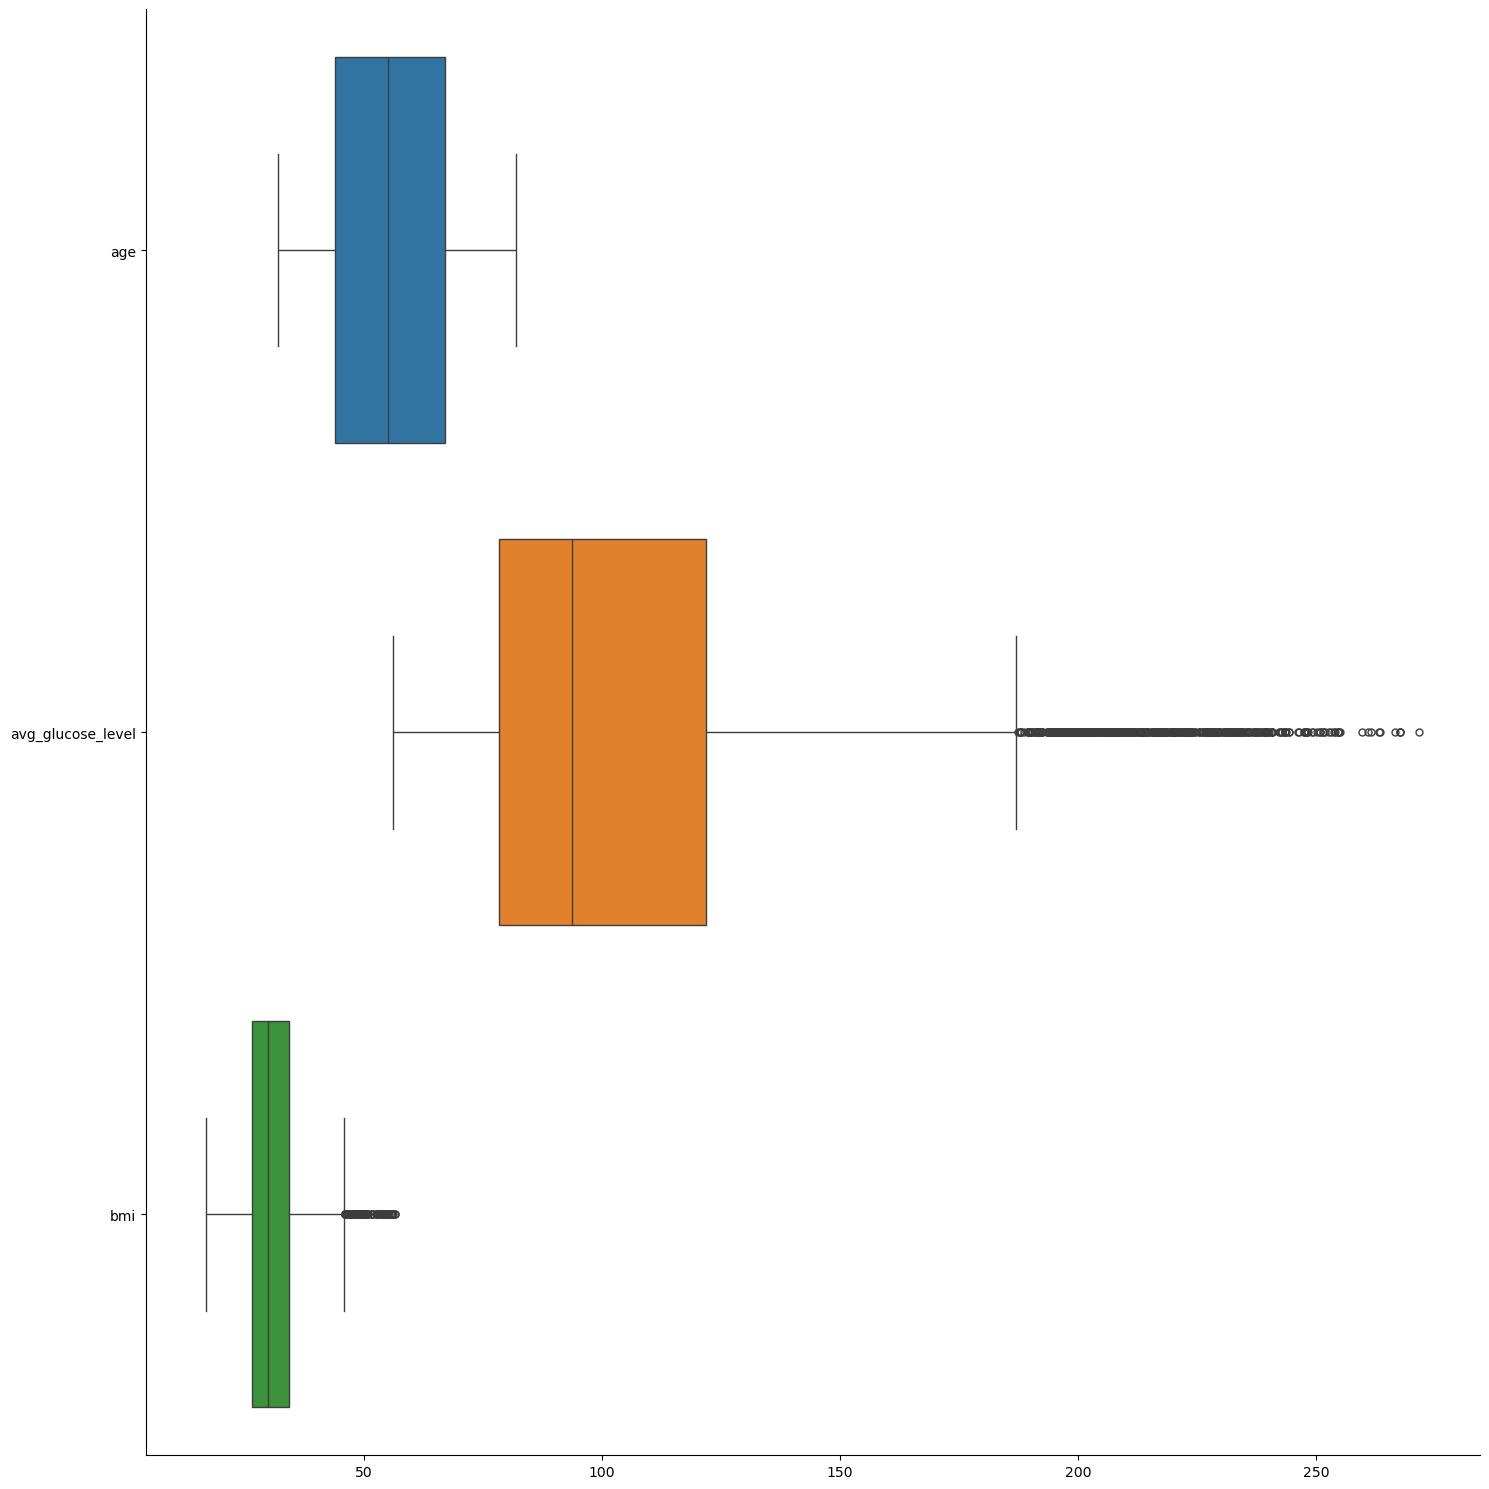

In [573]:
sns.catplot(data=stroke_df[['age', 'avg_glucose_level', 'bmi']], orient="h", kind="box", height = 15)

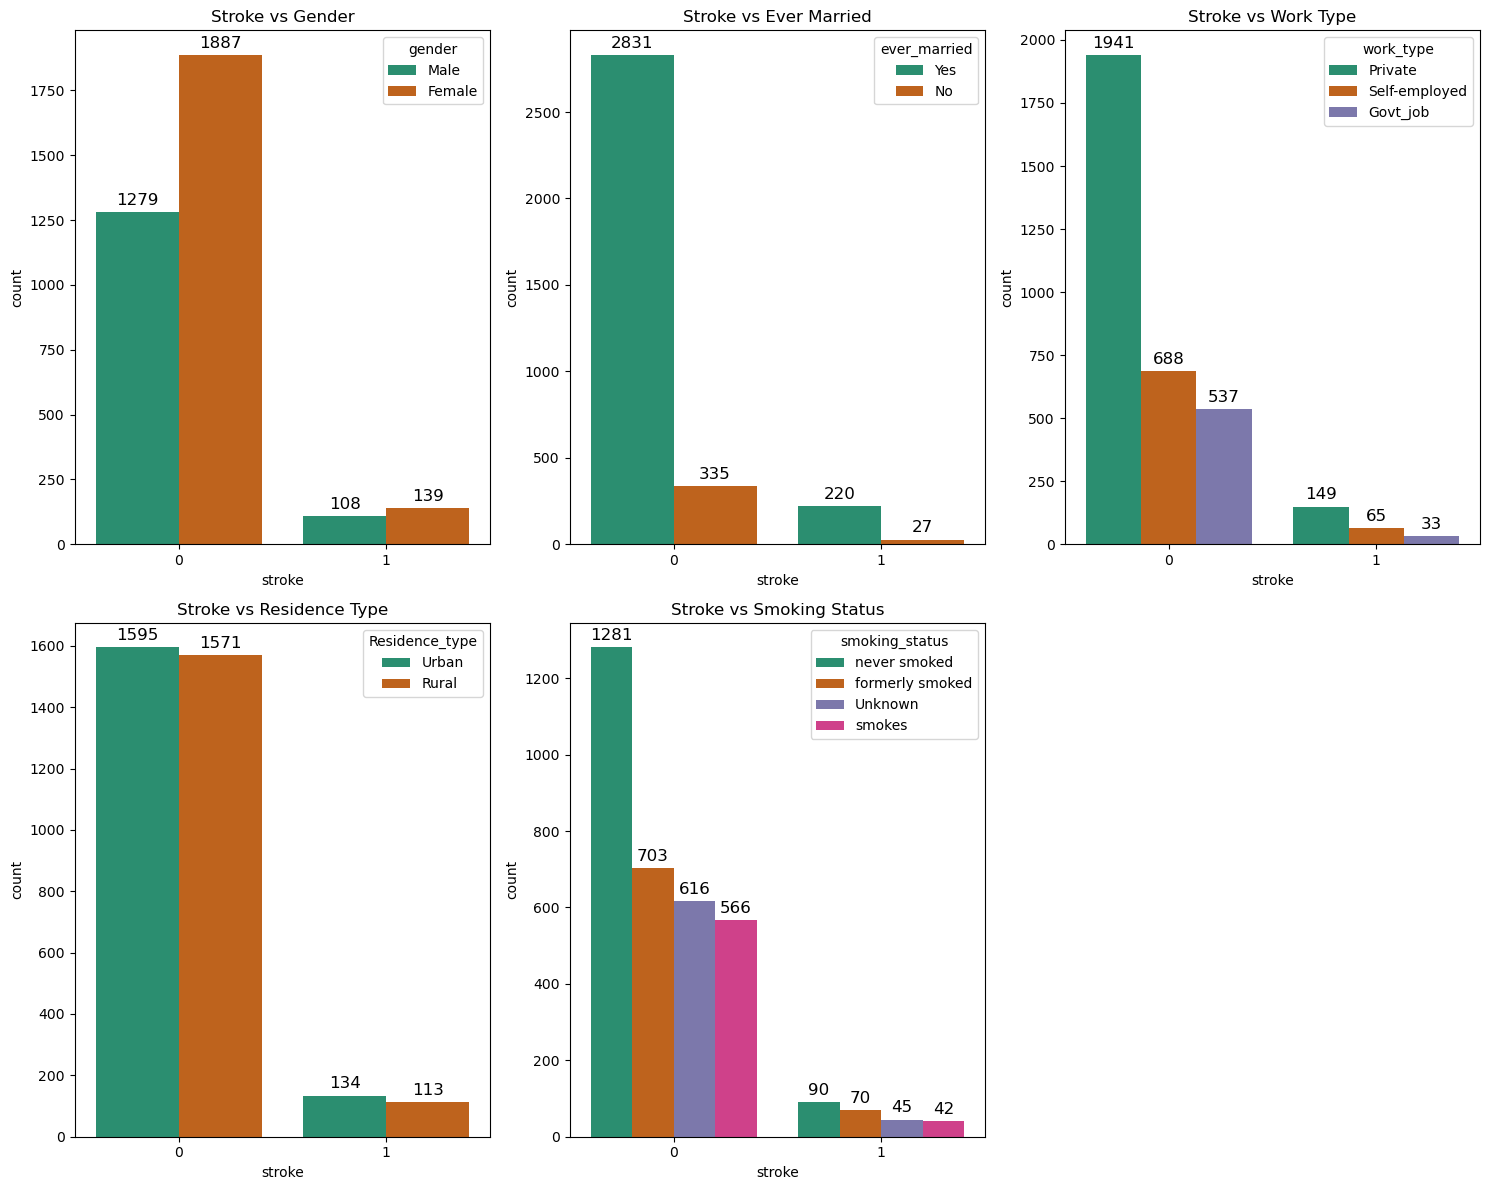

In [574]:
fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=3, layout='tight')

# Flatten the axes for easier iteration
ax = ax.flatten()

# Plot for each categorical variable with count labels on the edge of the bars in black color
sns.countplot(x='stroke', hue='gender', data=stroke_df, ax=ax[0], palette="Dark2")
ax[0].set_title("Stroke vs Gender")
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=12, color='black', label_type='edge', padding=3)

sns.countplot(x='stroke', hue='ever_married', data=stroke_df, ax=ax[1], palette="Dark2")
ax[1].set_title("Stroke vs Ever Married")
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=12, color='black', label_type='edge', padding=3)

sns.countplot(x='stroke', hue='work_type', data=stroke_df, ax=ax[2], palette="Dark2")
ax[2].set_title("Stroke vs Work Type")
for container in ax[2].containers:
    ax[2].bar_label(container, fontsize=12, color='black', label_type='edge', padding=3)

sns.countplot(x='stroke', hue='Residence_type', data=stroke_df, ax=ax[3], palette="Dark2")
ax[3].set_title("Stroke vs Residence Type")
for container in ax[3].containers:
    ax[3].bar_label(container, fontsize=12, color='black', label_type='edge', padding=3)

sns.countplot(x='stroke', hue='smoking_status', data=stroke_df, ax=ax[4], palette="Dark2")
ax[4].set_title("Stroke vs Smoking Status")
for container in ax[4].containers:
    ax[4].bar_label(container, fontsize=12, color='black', label_type='edge', padding=3)

# Remove the empty subplot
fig.delaxes(ax[5])

plt.show()


The countplot between stroke and marital status shows that individuals who are ever married are more prone to having a stroke.

In [575]:
# import pandas as pd
# import plotly.express as px

# # Assuming you have a grouped dataset
# grouped_df = stroke_df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']).size().reset_index(name='count')

# # Create a Sunburst chart with a larger figure size and more distinct colors for categories
# fig = px.sunburst(grouped_df, 
#                   path=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],  # Hierarchical categories
#                   values='count',  # Size of each segment
#                   color='stroke',  # Color based on stroke outcome (0 = No, 1 = Yes)
#                   title="Hierarchical Distribution of Stroke Outcome",
#                   labels={"stroke": "Stroke Outcome (0 = No, 1 = Yes)", 
#                           "gender": "Gender", 
#                           "ever_married": "Ever Married", 
#                           "work_type": "Work Type", 
#                           "Residence_type": "Residence Type", 
#                           "smoking_status": "Smoking Status"},
#                   color_continuous_scale='Viridis')  # Continuous color scale for stroke outcome (Yes vs No)

# # Remove hover information completely
# fig.update_traces(hoverinfo='none')

# # Add category names as text, and count will appear when you click on the segment
# fig.update_traces(textinfo='label+value')  # Display category name and count

# # Set count as text after clicking
# fig.update_layout(
#     hovermode=False,  # Disable hover interaction completely
#     width=1100,  # Increased width for a larger, clearer view
#     height=800,  # Increased height for a more spacious layout
#     margin=dict(t=50, l=50, r=50, b=50),  # Add padding around the chart for clarity
#     coloraxis_showscale=True,  # Show color scale legend
#     annotations=[  # Adding an annotation that can display counts
#         {
#             'text': "Click on a segment to see the count",  # Initial text
#             'x': 0.5,  # Position in the middle of the figure
#             'y': -0.1,  # Adjust the vertical position
#             'showarrow': False,  # No arrow
#             'font': {'size': 16, 'color': 'black'},
#             'align': 'center'
#         }
#     ]
# )

# # Show the plot
# fig.show()


In [576]:
# Filter dataset to include only cases where stroke = 1
stroke_only_df = stroke_df[stroke_df['stroke'] == 1]

# Group the filtered data
grouped_df = stroke_only_df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']).size().reset_index(name='count')

# Create a Sunburst chart with a larger figure size and more distinct colors for categories
fig = px.sunburst(grouped_df, 
                  path=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],  # Hierarchical categories
                  values='count',  # Size of each segment
                  title="Distribution of Stroke cases",
                  labels={"gender": "Gender", 
                          "ever_married": "Ever Married", 
                          "work_type": "Work Type", 
                          "Residence_type": "Residence Type", 
                          "smoking_status": "Smoking Status"},
                  color='count',  # Color based on count
                  color_continuous_scale='Tealgrn')  # Use a color scale based on count

# Add category names as text, and count will appear when you click on the segment
fig.update_traces(textinfo='label+value', 
                  insidetextorientation="auto",
                  textfont=dict(family='Arial', size=18, color='black', weight='bold'),
                  hoverinfo='none', marker=dict(line=dict(color='black', width=1))
                  )  # Display category name and count

# Set count as text after clicking
fig.update_layout(
    hovermode=False,  # Disable hover interaction completely
    width=1100,  # Increased width for a larger, clearer view
    height=1100,  # Increased height for a more spacious layout
    # margin=dict(t=50, l=50, r=50, b=50),  # Add padding around the chart for clarity
    coloraxis_showscale=True,  # Show color scale legend
    title_font=dict(size=40, family="Arial", color="black", weight = "bold"),
    title_x=0.5,
    title_y = 0.97
)

fig.write_html("sunburst_chart_stroke_grouped_data.html")

# Show the plot
fig.show()


[Sunburst Chart of Grouped Dataset](https://github.com/Mulders95/Team_1/blob/main/Stroke_Plots/sunburst_chart_stroke_grouped_data.html)